<span style="color:black;"> **Cassava is a staple food in most African countries and other parts of the world. Evaluating the root volume of tuber crops such as cassava is important for farmers, but traditional root volume estimation methods are labour intensive and invasive. Even though cassava plants are grown from cuttings that are exact copies (clones) of the parent plant, the amount of roots they produce still varies. The variability in root yield is not directly linked to the plant’s leaves or branches (canopy). This is still an active area of research.** </span>

**Farmers and agricultural researchers need to accurately estimate cassava root volume to increase growth and yield potential, define better crop management practices, and select strong varieties for drought hardiness, stress tolerance, and improved pest and disease resistance,**

<span style="color:red;"> **In this challenge, your goal is to estimate the root volume of different cassava plant varieties using a set of images that depict these different types. You will use computer vision and machine learning techniques to develop a robust, generalisable machine learning model for root volume estimation.** </span>

**The methods used to measure root volume in this challenge are non-destructive, since the physical extraction of the roots for measurements is not required. This is particularly useful since extracting and physically measuring the roots can be labour intensive, damaging to the plants, or infeasible.**

<span style="color:Orange;"> **Your solutions will help farmers grow better cassava crops, and address food security challenges across Africa.** </span>

<span style="color:blue;"> **The data for this challenge consists of separate folders of images of the roots of various cassava plants in the early and late stages of their growth. These images are obtained from scans of the cassava roots at different depths.** </span>

### <span style="color:red;"> **Evaluation** </span>
* <span style="color:blue;"> **The evaluation metric for this competition is RMSE.** </span>

* <span style="color:blue;"> **For every row in the dataset, submission files should contain 2 columns: ID and RootVolume.** </span>

* <span style="color:blue;"> **Where RootVolume is the target variable.** </span>

* <span style="color:blue;"> **Your submission file should look like this (numbers to show format only):** </span>

<span style="color:green;"> **The estimation of root volume should take into account the left and right images, since these represent parts of the full image. The full image can be segmented to identify the roots of the individual plant in it. Following this, you should then carry on with volume estimation.** </span>


<span style="color:black;"> **In addition to the image dataset, there is a CSV file containing suggested layer ranges with optimal images for training. You don’t have to adhere to these ranges. For each folder, the range of layers selected should also be listed in your submission.** </span>

In [1]:
# import the requred libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [32]:
# load the datasets

train_data = pd.read_csv ("C:/Users/Alvine/Desktop/Zindi Competition/Train.csv") # training dataset
test_data = pd.read_csv ("C:/Users/Alvine/Desktop/Zindi Competition/Test.csv") # testing dataset

In [33]:
# display the first 5 records for training dataset to have a clear glimpsy of the data we have
train_data.tail()

,ID,FolderName,PlantNumber,Side,Start,End,RootVolume,Genotype,Stage
381,ID_592215_Hfzzen,Ntqusw7xpb,4,L,19,31,2.2,TMEB419,Early
382,ID_995502_L5bkz9,Izbgyxre0g,4,R,22,33,1.3,IBA154810,Early
383,ID_490708_Isn2o5,Efaiye0hmy,1,R,20,30,4.8,IBA980581,Early
384,ID_899134_Gyrlfg,Rzyf8hal4j,1,R,38,47,1.3,IBA154810,Early
385,ID_747792_Ofa0wh,Izbgyxre0g,6,R,22,33,3.7,IBA154810,Early


In [34]:
# display the first 5 records fro testing dataset to have a clear glimpsy of the data we have
test_data.head()

,ID,FolderName,PlantNumber,Side,Start,End,Genotype,Stage
0,ID_208667_Hnkl8q,L5l1h3kekg,7,L,38,50,IITA-TMS-IBA000070,Early
1,ID_285249_Jnjvav,Wgutyon8uu,6,R,23,37,TMEB419,Early
2,ID_697947_Yec6bd,Mylwjeq6tq,3,R,19,42,IBA980581,Early
3,ID_534638_X3j91f,Pfp24vx905,2,R,27,34,TMEB419,Early
4,ID_929298_Xvymuz,Mrw7chmalv,4,R,30,43,IBA154810,Early


#### EDA ON TRAINING SET

In [35]:
# Check the data size to see the total number of rows and records in training set
train_data.shape

(386, 9)

* *from the output we can see that we have up to a total of 386 rows in the training dataset, which is relatively a smaller number of record* 

In [36]:
# Check the datatypes and further info from the data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           386 non-null    object 
 1   FolderName   386 non-null    object 
 2   PlantNumber  386 non-null    int64  
 3   Side         386 non-null    object 
 4   Start        386 non-null    int64  
 5   End          386 non-null    int64  
 6   RootVolume   386 non-null    float64
 7   Genotype     386 non-null    object 
 8   Stage        386 non-null    object 
dtypes: float64(1), int64(3), object(5)
memory usage: 27.3+ KB


In [37]:
train_data.dtypes


ID              object
FolderName      object
PlantNumber      int64
Side            object
Start            int64
End              int64
RootVolume     float64
Genotype        object
Stage           object
dtype: object

* *From the output, it is clear that we have three integer columns and 5 strings columns and 1 float column*

In [38]:
# Do Summary Statistics
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PlantNumber,386.0,3.974093,1.508195,1.0,3.0,4.0,5.0,7.0
Start,386.0,27.018135,8.234686,8.0,22.0,26.0,32.0,49.0
End,386.0,36.989637,7.960611,14.0,32.0,37.0,42.0,60.0
RootVolume,386.0,2.052306,1.526302,0.0,0.9,1.9,2.7,11.0


* *The describe () methode dispays the statistical summany on numerical columns.*
* 
**Interpretation**
  * PlantNumber is not much relevant in summary statistics
  * **Start:**
  >*  The mean for the starting layer for optimal image selection is 27.02, where minimum starting layer is 8.0 and maximum starting layer is 49.0
  * **End:**
  >* The mean of end layer for optimal image selection is 36.99, where the minimum  layer is 14.0 and max layer is 60.0 wheras midian value is 37.0
  * **RootVolume**
  >* The mean value of root volume is 2.05.. while the minimum volume is 0.0 and max volume is 11.0 and the median volume is 1.9
  

In [39]:
# check for null values in the training set

train_data.isnull().sum()

ID             0
FolderName     0
PlantNumber    0
Side           0
Start          0
End            0
RootVolume     0
Genotype       0
Stage          0
dtype: int64

* *from the output on checking the null values, it is clear that there is 0 missing values in the training set*

In [40]:
# check unique values for stage and side columns
train_data.Side.value_counts()

Side
L    200
R    186
Name: count, dtype: int64

* *total number of Ls rows is 200 and total number of Rs records is 186*

In [41]:
stage_col = train_data.Stage.value_counts()
stage_col

Stage
Early    370
Late      16
Name: count, dtype: int64

* *total number of Early rows is 370 and total number of Late records is 16*

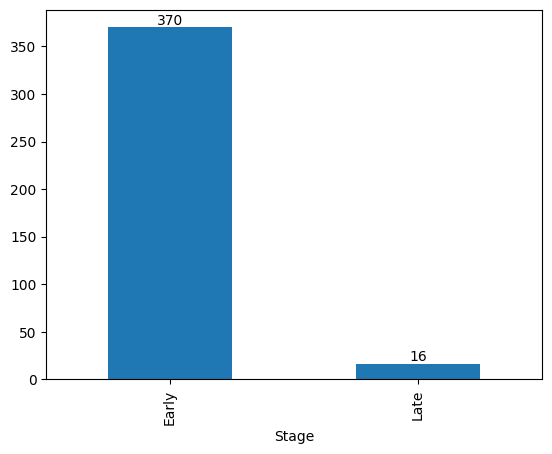

In [42]:
# bar graph to visualize the stages of cassava plant
ax = stage_col.plot(kind = "bar" )

for i in ax.containers:
    ax.bar_label (i)

In [43]:
plant_num_col = train_data.PlantNumber.value_counts()
plant_num_col

PlantNumber
4    91
3    82
5    76
6    52
2    51
1    18
7    16
Name: count, dtype: int64

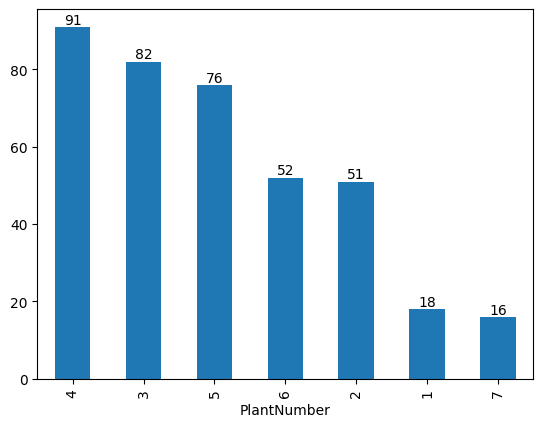

In [44]:
# bar graph to visualize the plant number column
ax = plant_num_col.plot(kind = "bar" )

for i in ax.containers:
    ax.bar_label (i)

##### check for the duplicates

In [45]:
# Check for duplicate rows
duplicate_rows = train_data[train_data.duplicated()]
duplicate_rows



,ID,FolderName,PlantNumber,Side,Start,End,RootVolume,Genotype,Stage


In [46]:

# Check for duplicate values based on a specific column (e.g., 'ID')
duplicate_ids = train_data[train_data.duplicated(subset=['ID'])]
duplicate_ids

,ID,FolderName,PlantNumber,Side,Start,End,RootVolume,Genotype,Stage


In [47]:
# checking the total number of duplicate rows if any
print(train_data.duplicated().sum()) # Total duplicate rows


0


In [48]:
# checking the total number of duplicate rows if any using ID
print(train_data.duplicated(subset=['ID']).sum())  # Duplicates in 'ID' column


0


* *From the analysis we can see there is no duplicared values in the dataset*

##### **Checking for the outliears using boxplot**

In [49]:
train_data.tail()

,ID,FolderName,PlantNumber,Side,Start,End,RootVolume,Genotype,Stage
381,ID_592215_Hfzzen,Ntqusw7xpb,4,L,19,31,2.2,TMEB419,Early
382,ID_995502_L5bkz9,Izbgyxre0g,4,R,22,33,1.3,IBA154810,Early
383,ID_490708_Isn2o5,Efaiye0hmy,1,R,20,30,4.8,IBA980581,Early
384,ID_899134_Gyrlfg,Rzyf8hal4j,1,R,38,47,1.3,IBA154810,Early
385,ID_747792_Ofa0wh,Izbgyxre0g,6,R,22,33,3.7,IBA154810,Early


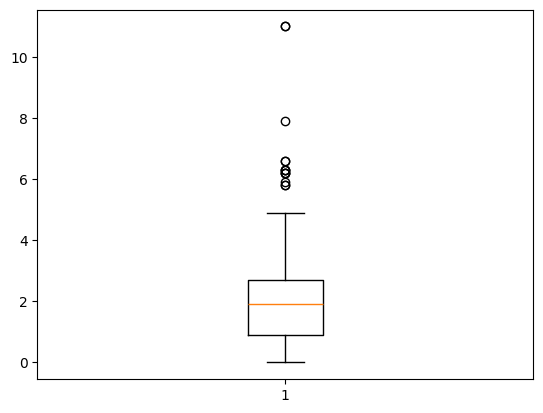

In [50]:
#
plt.boxplot(x= 'RootVolume', data = train_data)
plt.show()

In [51]:


# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = train_data['RootVolume'].quantile(0.25)
Q3 = train_data['RootVolume'].quantile(0.75)

# Compute IQR
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = train_data[(train_data['RootVolume'] < lower_bound) | (train_data['RootVolume'] > upper_bound)]



# Count outliers
num_outliers = outliers.shape[0]
print(f"Number of outliers in 'RootVolume': {num_outliers}")

Number of outliers in 'RootVolume': 14


In [52]:
# Display the outliers
outliers

,ID,FolderName,PlantNumber,Side,Start,End,RootVolume,Genotype,Stage
10,ID_199600_Ewizmo,Lzkaccojep,4,L,24,39,6.2,TMEB419,Early
39,ID_684183_Sdvb3a,Pctl4tyb9l,4,L,46,53,7.9,IITA-TMS-IBA000070,Early
66,ID_643905_Ruonfx,Lwuwokuhrf,5,R,15,30,5.8,TMEB419,Early
136,ID_579277_S5z2ov,B8x7mhxe6z,5,R,20,30,6.6,IBA154810,Early
154,ID_692153_Vihmpz,Mpmvh2mgm3,3,R,24,38,6.3,TMEB419,Early
155,ID_713907_Yoe0xx,Mpmvh2mgm3,5,L,32,40,6.3,TMEB419,Early
191,ID_352618_Bkgck9,F5lrpuuq8q,4,R,23,31,6.3,IBA980581,Early
230,ID_378076_Nrudei,Lzkaccojep,4,R,16,25,6.2,TMEB419,Early
235,ID_780516_Qapi7e,Lwuwokuhrf,3,L,25,40,5.8,TMEB419,Early
269,ID_700742_Mn3cha,Cvdxhjziab,3,L,10,23,5.9,IITA-TMS-IBA000070,Late


In [53]:
# Filtering out the outliers
train_dat2 = train_data[(train_data['RootVolume']>=lower_bound) & (train_data['RootVolume'] <=upper_bound) ]

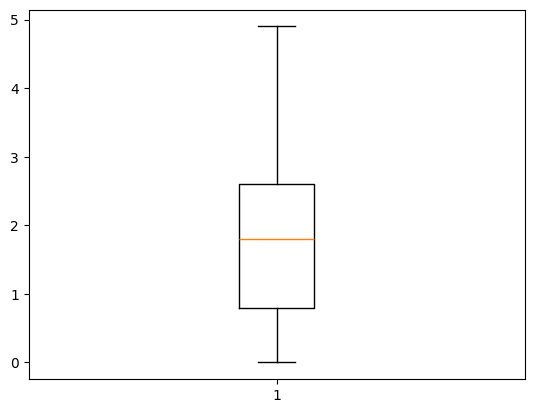

In [54]:
plt.boxplot(x= 'RootVolume', data = train_dat2 )
plt.show()

In [55]:
train_dat2.shape

(372, 9)

In [56]:
train_dat2.head()

,ID,FolderName,PlantNumber,Side,Start,End,RootVolume,Genotype,Stage
0,ID_826322_Lbmaya,A6dzrkjqvl,3,L,33,42,0.9,IITA-TMS-IBA000070,Early
1,ID_718181_Bslpwx,Ypktwvqjbn,7,L,33,41,1.5,IBA154810,Early
2,ID_465762_L1n61d,Ox18ob0syv,4,R,21,28,2.7,IBA980581,Early
3,ID_626872_Pbmx2e,Hqcekwpxgu,2,R,30,39,2.6,IITA-TMS-IBA000070,Early
4,ID_518846_Opko8c,Ummqfuetoc,1,R,17,26,2.7,IBA980581,Early


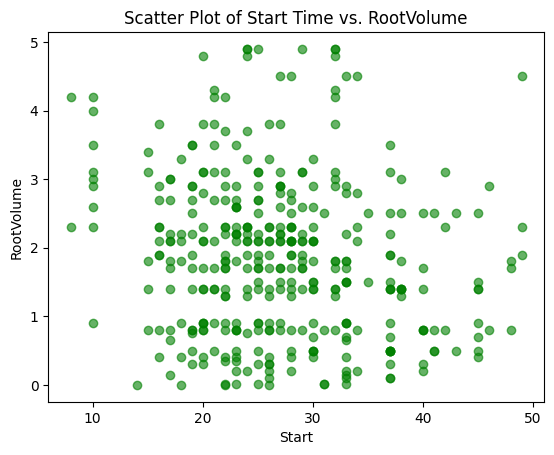

In [57]:
plt.scatter(train_dat2['Start'], train_dat2['RootVolume'], alpha=0.6, color='g')
plt.xlabel('Start')
plt.ylabel('RootVolume')
plt.title('Scatter Plot of Start Time vs. RootVolume')
plt.show()

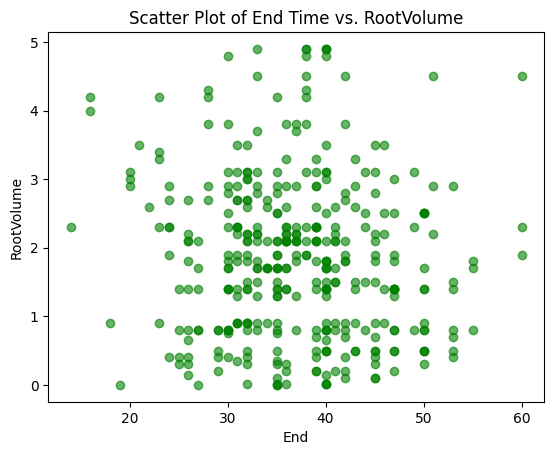

In [58]:
plt.scatter(train_dat2['End'], train_dat2['RootVolume'], alpha=0.6, color='g')
plt.xlabel('End')
plt.ylabel('RootVolume')
plt.title('Scatter Plot of End Time vs. RootVolume')
plt.show()

In [59]:
import seaborn as sns

corr_cols = train_dat2[['PlantNumber', 'Start', 'End', 'RootVolume']]
corr_cols.head()


,PlantNumber,Start,End,RootVolume
0,3,33,42,0.9
1,7,33,41,1.5
2,4,21,28,2.7
3,2,30,39,2.6
4,1,17,26,2.7


In [60]:
# Calculate the correlation matrix
corr_matrix = corr_cols.corr()
corr_matrix



,PlantNumber,Start,End,RootVolume
PlantNumber,1.000000,0.069999,0.071646,-0.067492
Start,0.069999,1.000000,0.891714,-0.156558
End,0.071646,0.891714,1.000000,-0.092754
RootVolume,-0.067492,-0.156558,-0.092754,1.000000


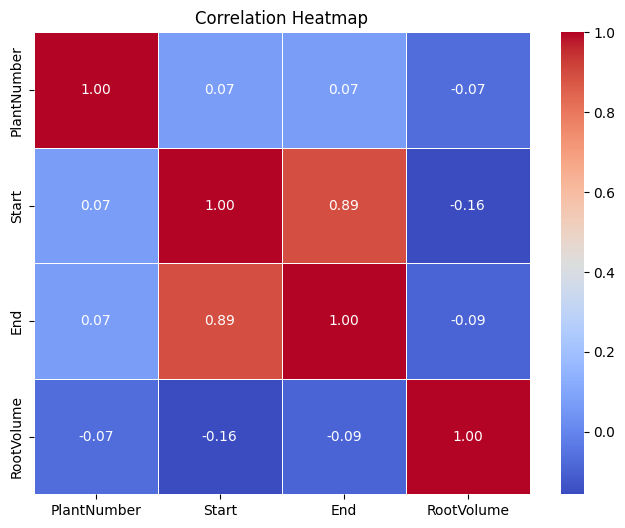

In [61]:
# Creating  the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()